## Read XML annotation file

In [5]:
import xml.etree.ElementTree as ET
tree = ET.parse('data/masks/orig/TCGA-B0-5710-01Z-00-DX1.xml')
root = tree.getroot()

## Finally the right order!!

In [6]:
# reverse the img

import numpy as np
import matplotlib.pyplot as plt 
img = np.zeros((1000, 1000))

# fill the segments
for neighbor in root.iter('Region'):
    # print(neighbor.attrib)
    idd = neighbor.get('Id')
    # aa = neighbor.get('Area')
    for i in neighbor[1]:
        # print(idd, i.get("X"), i.get("Y"))
        # x,y = round(1000.0 - float(i.get("X"))), 1000.0 - round(float(i.get("Y")))
        x,y = round(float(i.get("X"))),round(float(i.get("Y")))
        if(x < 1000 and y < 1000):
            img[y, x] = 255

fig=plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.cm.gray)
plt.show()            

In [12]:
import matplotlib.pyplot as plt 
tis = plt.imread("data/images/TCGA-B0-5710-01Z-00-DX1.tif")

fig=plt.figure(figsize=(10, 10))
plt.imshow(tis)
plt.show() 

ValueError: tile cannot extend outside image

In [4]:
tis.shape

(1000, 1000, 4)

## fill the holes

In [3]:
from scipy import ndimage
binary = img.copy()
binary[binary > 0] = 1
img_fill_holes=ndimage.binary_fill_holes(binary).astype(int)

NameError: name 'img' is not defined

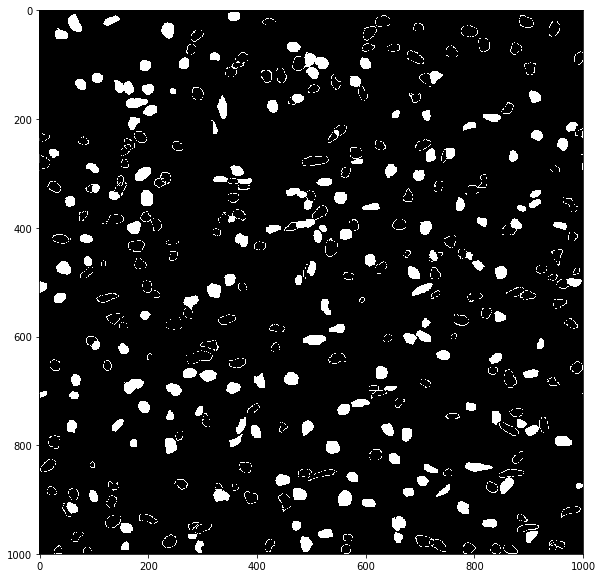

In [17]:
fig=plt.figure(figsize=(10, 10))
plt.imshow(img_fill_holes, cmap=plt.cm.gray)
plt.show()    

Reference: how to fill a donut
https://krstn.eu/How-to-fill-a-Donut/

## Using the dilate function to close contours

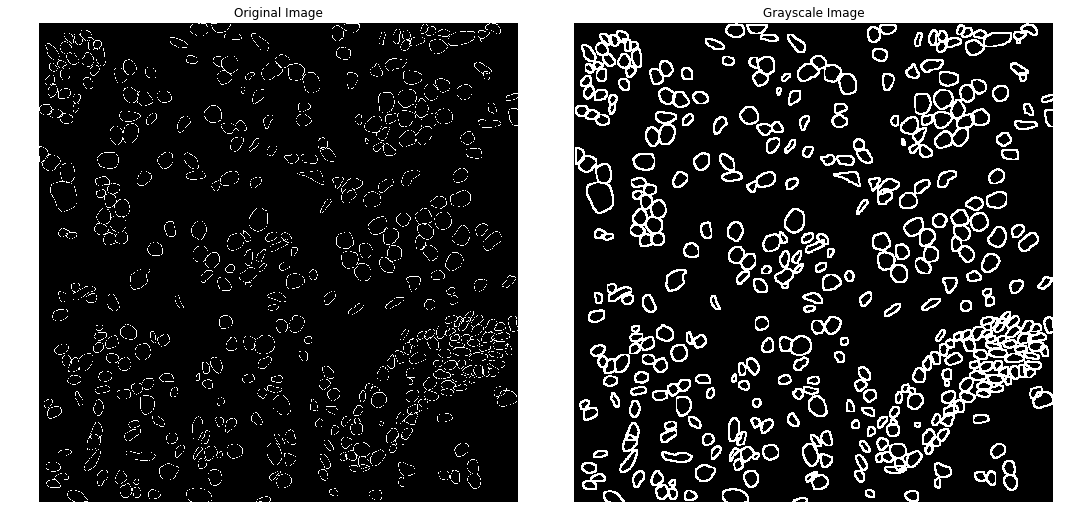

In [16]:
import cv2 
import numpy as np

kernel = np.ones((2,2), np.uint8)
dilation = cv2.dilate(img, kernel, iterations = 3)
closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
plt.imshow(img, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(closing, cmap='gray')
plt.axis('off')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()

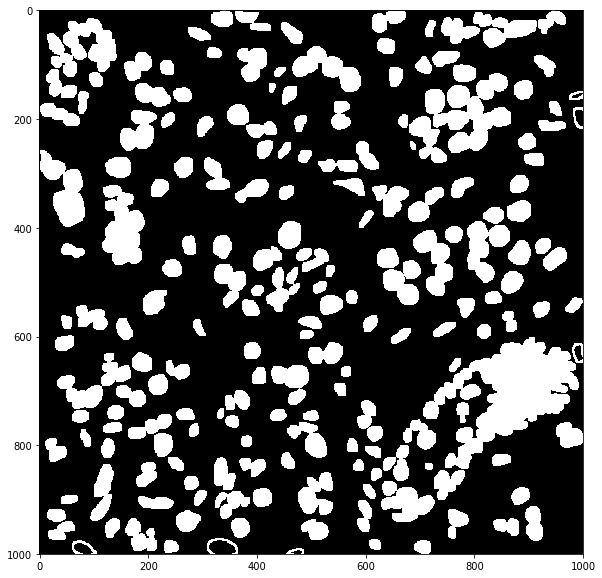

In [17]:
from scipy import ndimage
# binary = img.copy()
# binary[binary > 0] = 1
img_fill_holes=ndimage.binary_fill_holes(closing).astype(int)

fig=plt.figure(figsize=(10, 10))
plt.imshow(img_fill_holes, cmap=plt.cm.gray)
plt.show()

## pad 0 on edges and remove???

In [22]:
closing.shape

(1000, 1000)

In [32]:
padd = np.pad(closing, 3, 'constant', constant_values=10)
padd[:10, :10]

array([[ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.,  10.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 10.,  10.,  10.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]])

## cut 10-20 pixels on the edge?

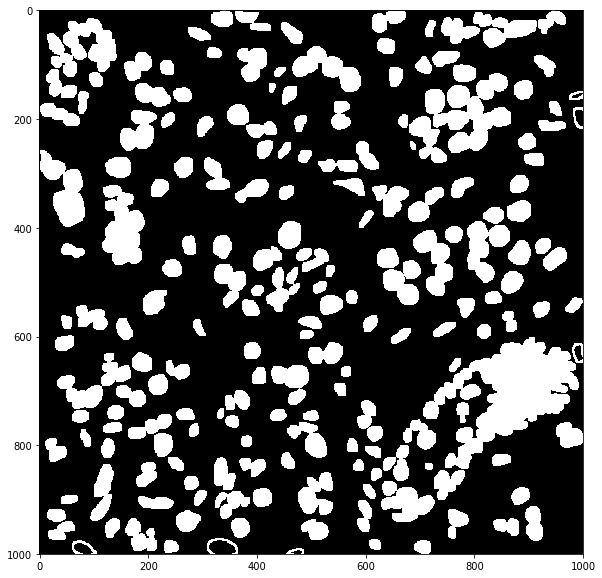

In [18]:
fig=plt.figure(figsize=(10, 10))
plt.imshow(img_fill_holes, cmap=plt.cm.gray)
plt.show()

## create funtions to process all annotations

In [26]:
import os
files = os.listdir('data/masks/orig')
files

['TCGA-G9-6348-01Z-00-DX1.xml',
 'TCGA-B0-5698-01Z-00-DX1.xml',
 'TCGA-A7-A13E-01Z-00-DX1.xml',
 'TCGA-NH-A8F7-01A-01-TS1.xml',
 'TCGA-HE-7130-01Z-00-DX1.xml',
 'TCGA-AR-A1AS-01Z-00-DX1.xml',
 'TCGA-DK-A2I6-01A-01-TS1.xml',
 'TCGA-18-5592-01Z-00-DX1.xml',
 'TCGA-G9-6336-01Z-00-DX1.xml',
 'TCGA-B0-5711-01Z-00-DX1.xml',
 'TCGA-HE-7129-01Z-00-DX1.xml',
 'TCGA-G9-6362-01Z-00-DX1.xml',
 'TCGA-A7-A13F-01Z-00-DX1.xml',
 'TCGA-B0-5710-01Z-00-DX1.xml',
 'TCGA-CH-5767-01Z-00-DX1.xml',
 'TCGA-38-6178-01Z-00-DX1.xml',
 'TCGA-G2-A2EK-01A-02-TSB.xml',
 'TCGA-E2-A14V-01Z-00-DX1.xml',
 'TCGA-21-5784-01Z-00-DX1.xml',
 'TCGA-E2-A1B5-01Z-00-DX1.xml',
 'TCGA-50-5931-01Z-00-DX1.xml',
 'TCGA-AR-A1AK-01Z-00-DX1.xml',
 'TCGA-RD-A8N9-01A-01-TS1.xml',
 'TCGA-49-4488-01Z-00-DX1.xml',
 'TCGA-21-5786-01Z-00-DX1.xml',
 'TCGA-KB-A93J-01A-01-TS1.xml',
 'TCGA-AY-A8YK-01A-01-TS1.xml',
 'TCGA-G9-6356-01Z-00-DX1.xml',
 'TCGA-HE-7128-01Z-00-DX1.xml',
 'TCGA-G9-6363-01Z-00-DX1.xml']

In [20]:
from glob import glob
for name in glob('data/masks/orig/*.xml'):
    print (name)

data/masks/orig/TCGA-G9-6348-01Z-00-DX1.xml
data/masks/orig/TCGA-B0-5698-01Z-00-DX1.xml
data/masks/orig/TCGA-A7-A13E-01Z-00-DX1.xml
data/masks/orig/TCGA-NH-A8F7-01A-01-TS1.xml
data/masks/orig/TCGA-HE-7130-01Z-00-DX1.xml
data/masks/orig/TCGA-AR-A1AS-01Z-00-DX1.xml
data/masks/orig/TCGA-DK-A2I6-01A-01-TS1.xml
data/masks/orig/TCGA-18-5592-01Z-00-DX1.xml
data/masks/orig/TCGA-G9-6336-01Z-00-DX1.xml
data/masks/orig/TCGA-B0-5711-01Z-00-DX1.xml
data/masks/orig/TCGA-HE-7129-01Z-00-DX1.xml
data/masks/orig/TCGA-G9-6362-01Z-00-DX1.xml
data/masks/orig/TCGA-A7-A13F-01Z-00-DX1.xml
data/masks/orig/TCGA-B0-5710-01Z-00-DX1.xml
data/masks/orig/TCGA-CH-5767-01Z-00-DX1.xml
data/masks/orig/TCGA-38-6178-01Z-00-DX1.xml
data/masks/orig/TCGA-G2-A2EK-01A-02-TSB.xml
data/masks/orig/TCGA-E2-A14V-01Z-00-DX1.xml
data/masks/orig/TCGA-21-5784-01Z-00-DX1.xml
data/masks/orig/TCGA-E2-A1B5-01Z-00-DX1.xml
data/masks/orig/TCGA-50-5931-01Z-00-DX1.xml
data/masks/orig/TCGA-AR-A1AK-01Z-00-DX1.xml
data/masks/orig/TCGA-RD-A8N9-01A

In [21]:
def fill_hole(img):
    kernel = np.ones((2,2), np.uint8)
    dilation = cv2.dilate(img, kernel, iterations = 3)
    closing = cv2.morphologyEx(dilation, cv2.MORPH_CLOSE, kernel)
    img_fill_holes=ndimage.binary_fill_holes(closing).astype(int)
    return img_fill_holes

In [22]:
def get_img(f):
    tree = ET.parse('data/masks/orig/' + f)
    root = tree.getroot()
    img = np.zeros((1000, 1000))

    for neighbor in root.iter('Region'):
        idd = neighbor.get('Id')
        for i in neighbor[1]:
            x,y = round(float(i.get("X"))),round(float(i.get("Y")))
            if(x < 1000 and y < 1000):
                img[y, x] = 255
    return(img)


In [28]:
for f in files:
    img = get_img(f)
    out = fill_hole(img)
    f_out = f[:-3] + 'npy'
    print(f_out)
    np.save('data/masks/test/' + f_out, out)

TCGA-G9-6348-01Z-00-DX1.npy
TCGA-B0-5698-01Z-00-DX1.npy
TCGA-A7-A13E-01Z-00-DX1.npy
TCGA-NH-A8F7-01A-01-TS1.npy
TCGA-HE-7130-01Z-00-DX1.npy
TCGA-AR-A1AS-01Z-00-DX1.npy
TCGA-DK-A2I6-01A-01-TS1.npy
TCGA-18-5592-01Z-00-DX1.npy
TCGA-G9-6336-01Z-00-DX1.npy
TCGA-B0-5711-01Z-00-DX1.npy
TCGA-HE-7129-01Z-00-DX1.npy
TCGA-G9-6362-01Z-00-DX1.npy
TCGA-A7-A13F-01Z-00-DX1.npy
TCGA-B0-5710-01Z-00-DX1.npy
TCGA-CH-5767-01Z-00-DX1.npy
TCGA-38-6178-01Z-00-DX1.npy
TCGA-G2-A2EK-01A-02-TSB.npy
TCGA-E2-A14V-01Z-00-DX1.npy
TCGA-21-5784-01Z-00-DX1.npy
TCGA-E2-A1B5-01Z-00-DX1.npy
TCGA-50-5931-01Z-00-DX1.npy
TCGA-AR-A1AK-01Z-00-DX1.npy
TCGA-RD-A8N9-01A-01-TS1.npy
TCGA-49-4488-01Z-00-DX1.npy
TCGA-21-5786-01Z-00-DX1.npy
TCGA-KB-A93J-01A-01-TS1.npy
TCGA-AY-A8YK-01A-01-TS1.npy
TCGA-G9-6356-01Z-00-DX1.npy
TCGA-HE-7128-01Z-00-DX1.npy
TCGA-G9-6363-01Z-00-DX1.npy


In [29]:
'mask_out/' + files[5][:-3] + 'npy'

'mask_out/TCGA-AR-A1AS-01Z-00-DX1.npy'

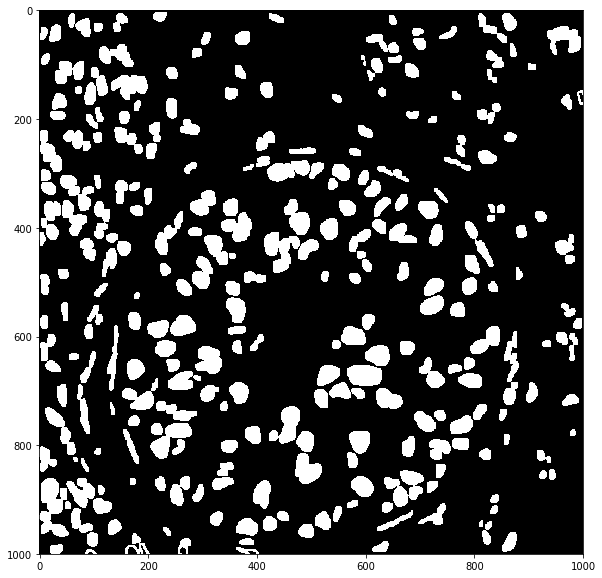

In [31]:
img_test = np.load('data/masks/test/TCGA-G2-A2EK-01A-02-TSB.npy')
fig=plt.figure(figsize=(10, 10))
plt.imshow(img_test, cmap=plt.cm.gray)
plt.show()

In [60]:
img_test.shape

(900, 900)